## Цель кейса

У данного кейса две цели: аналитическая и прикладная.

Аналитическая цель состоит в том, чтобы научиться творчески исследовать данные с целью извлечения пользы для продукта.

Прикладная цель — продумать план разработки собственного онлайн-тренажера ЕГЭ на основе предоставленных данных.

## Описание датасета

### inf_ege_data

Датасет **`inf_ege_data`** содержит решения задач детьми на некоторой онлайн-платформе.

* **user_id** — ID пользователя
* **task_id** — ID задачи
* **flow_type** — Где пользователь решал задачу:
    * `practice` — Практика. Пользователь решает подряд задачи одного номера разной сложности. Он может получать подсказки к решению и имеет неограниченное число попыток
    * `variant` — Пробник. Пользователь решает собранный вариант. Подсказок нет, пользователь не видит результат пока не завершит весь вариант, поэтому число попыток не учитывается.
* **task_number** — Номер задачи в варианте ЕГЭ
* **difficulty** — Сложность задачи, число от 1 до 5
* **date** — Дата решения задачи
* **attempts_cnt** — Сколько пользователь сделал попыток решить задачу; может принимать значения от 0, где 0 - пользователь открыл задачу, но даже не попробовал ее решить. Принимает значение `null` для вариантов
* **hints_cnt** — Сколько раз пользователь использовал подсказки, null для вариантов
* **is_correct** — Булевый флаг. Показывает, решил ли правильно задачу

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('inf_ege_data.csv',
                 dtype={'attempts_cnt': 'UInt32', 'hints_cnt': 'UInt32'},
                 parse_dates=['date'])

df.head()

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665


### WAU

In [ ]:
import numpy as np

df['weekday'] = df['date'].dt.weekday

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,weekday
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,1
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,1
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,1
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,1
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,1
...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,1
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,1
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,1
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,1


In [ ]:
df['weekday'] = df['weekday'].apply(lambda x: np.timedelta64(x, 'D'))

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,weekday
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,1 days
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,1 days
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,1 days
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,1 days
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,1 days
...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,1 days
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,1 days
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,1 days
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,1 days


In [ ]:
df['week'] = df['date'] - df['weekday']

df

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,weekday,week
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,1 days,2024-03-25
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,1 days,2024-03-25
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,1 days,2024-03-25
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,1 days,2024-03-25
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,1 days,2024-03-25
...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,1 days,2024-03-25
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,1 days,2024-03-25
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,1 days,2024-03-25
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,1 days,2024-03-25


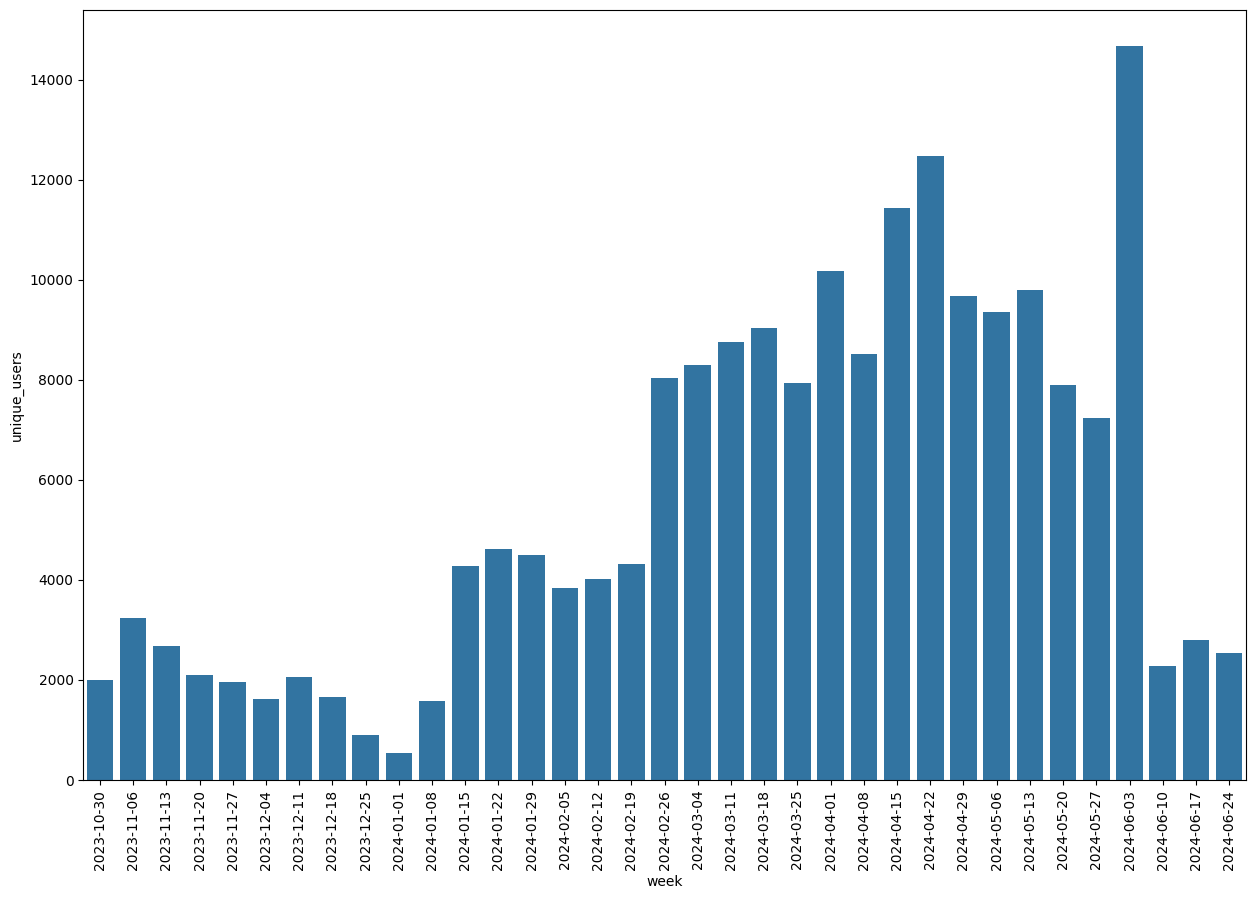

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))

week_agg = df.groupby('week').agg(unique_users=('user_id', 'nunique'))

sns.barplot(week_agg, x='week', y='unique_users')

plt.xticks(rotation=90)

plt.show()